In [3]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier

# Modelling Helpers
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV

# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

In [4]:
df = pd.read_csv('GroceryDataset.csv')
df

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description
0,Bakery & Desserts,$56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...
1,Bakery & Desserts,$159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord..."
2,Bakery & Desserts,$44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...
3,Bakery & Desserts,$39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...
4,Bakery & Desserts,$59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...
...,...,...,...,...,...,...,...,...
1752,Snacks,$23.99,No Discount,NaN,"Oberto Thin Style Smoked Sausage Stick, Cockta...",$,Cocktail Pepperoni Smoked Sausage Sticks 3...,Cocktail PepperoniSmoked Sausage Sticks3 oz ba...
1753,Snacks,$49.99,No Discount,NaN,"Cheetos Crunchy, Original, 2.1 oz, 64-count",$,Made with Real Cheese,64-count2.1 oz Bags
1754,Snacks,$22.99,No Discount,NaN,"Sabritas Chile & Limon Mix, Variety Pack, 30-c...",$,Chile & Limón Mix Variety Pack 30 ct Net...,8-Doritos Dinamita Chile Limón Flavored Rolled...
1755,Snacks,$17.49,No Discount,NaN,"Fruit Roll-Ups, Variety Pack, 72-count",$,Variety Pack 1 Box with 72 Rolls Flavore...,Fruit Flavored Snacks\nVariety Includes: Straw...


In [5]:
(df.isnull().sum()).sort_values(ascending=False)

Rating                 1075
Product Description      42
Feature                  18
Currency                  5
Price                     3
Sub Category              0
Discount                  0
Title                     0
dtype: int64

In [6]:
df['Price'].unique()


array(['$56.99 ', '$159.99 ', '$44.99 ', '$39.99 ', '$59.99 ', '$74.99 ',
       '$29.99 ', '$62.99 ', '$299.99 ', '$54.99 ', '$89.99 ', '$49.99 ',
       '$99.99 ', '$24.99 ', '$72.99 ', '$119.99 ', '$109.99 ', '$34.99 ',
       '$27.99 ', '$21.99 ', '$20.99 ', '$19.99 ', '$439.99 ', '$9.99 ',
       '$14.99 ', '$18.99 ', '$21.49 ', '$17.99 ', '$23.99 ', '$4.99 ',
       '$12.99 ', '$32.99 ', '$13.79 ', '$23.49 ', '$22.99 ', '$8.99 ',
       '$15.99 ', '$28.99 ', '$16.49 ', '$549.99 ', '$17.49 ', '$25.99 ',
       '$11.69 ', '$69.99 ', '$21.79 ', '$37.99 ', '$139.99 ', '$41.99 ',
       '$18.49 ', '$16.99 ', '$36.99 ', '$10.99 ', '$61.99 ', '$17.59 ',
       '$11.99 ', '$24.49 ', '$10.49 ', '$9.69 ', '$8.19 ', '$9.49 ',
       '$12.49 ', '$12.69 ', '$31.99 ', '$15.49 ', '$46.99 ', '$11.49 ',
       '$16.39 ', '$13.99 ', '$38.99 ', '$26.99 ', '$13.49 ', '$14.49 ',
       '$26.69 ', '$42.99 ', '$45.99 ', '$7.99 ', '$25.69 ', '$19.49 ',
       '$12.09 ', '$10.79 ', '$17.89 ', '$28.79 ', 

In [8]:
def handle_price(price_str):
    if isinstance(price_str, str):
        price_str = price_str.replace('$', '').replace(',', '').strip()
        price_str = price_str.replace('through', '').replace('$', '').replace(',', '').strip()
    else:
        return price_str

    if '-' in price_str:
        low, high = price_str.split('-')
        return (float(low) + float(high)) / 2
    else:
        return float(price_str)


In [9]:
df['Price'] = df['Price'].apply(handle_price)
df['Price'].unique()


array([  56.99,  159.99,   44.99,   39.99,   59.99,   74.99,   29.99,
         62.99,  299.99,   54.99,   89.99,   49.99,   99.99,   24.99,
         72.99,  119.99,  109.99,   34.99,   27.99,   21.99,   20.99,
         19.99,  439.99,    9.99,   14.99,   18.99,   21.49,   17.99,
         23.99,    4.99,   12.99,   32.99,   13.79,   23.49,   22.99,
          8.99,   15.99,   28.99,   16.49,  549.99,   17.49,   25.99,
         11.69,   69.99,   21.79,   37.99,  139.99,   41.99,   18.49,
         16.99,   36.99,   10.99,   61.99,   17.59,   11.99,   24.49,
         10.49,    9.69,    8.19,    9.49,   12.49,   12.69,   31.99,
         15.49,   46.99,   11.49,   16.39,   13.99,   38.99,   26.99,
         13.49,   14.49,   26.69,   42.99,   45.99,    7.99,   25.69,
         19.49,   12.09,   10.79,   17.89,   28.79,   84.99,   58.49,
         20.89,    9.79,   29.89,  199.99,   47.99,   18.39,   43.99,
         33.99,   28.49,   10.29,   35.99,   48.99,   29.69,    6.59,
        149.99,  649

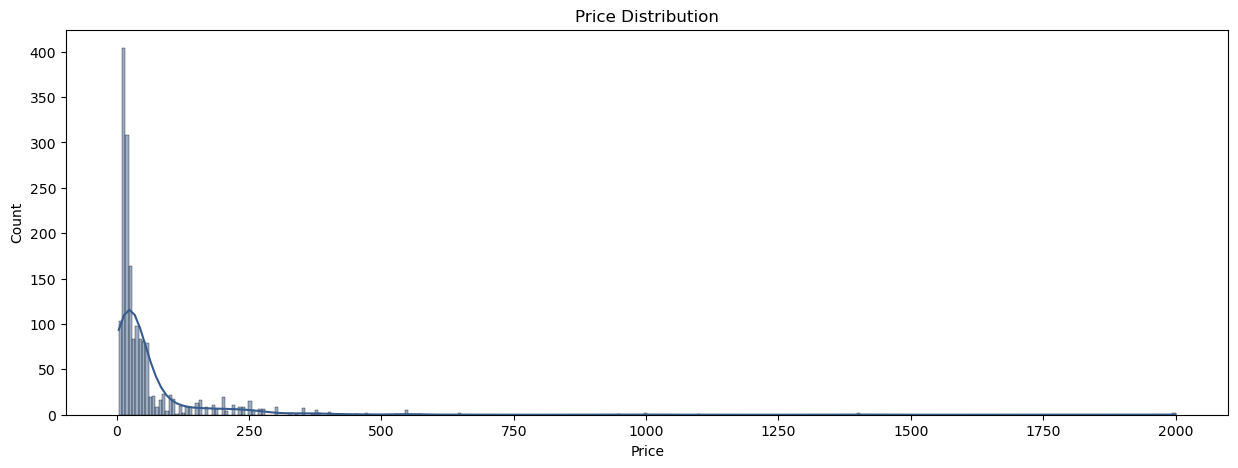

In [10]:
plt.figure(figsize=(15,5))
sns.histplot(data=df, x="Price", kde=True, color=sns.color_palette("viridis")[1])
plt.title("Price Distribution")
plt.show()

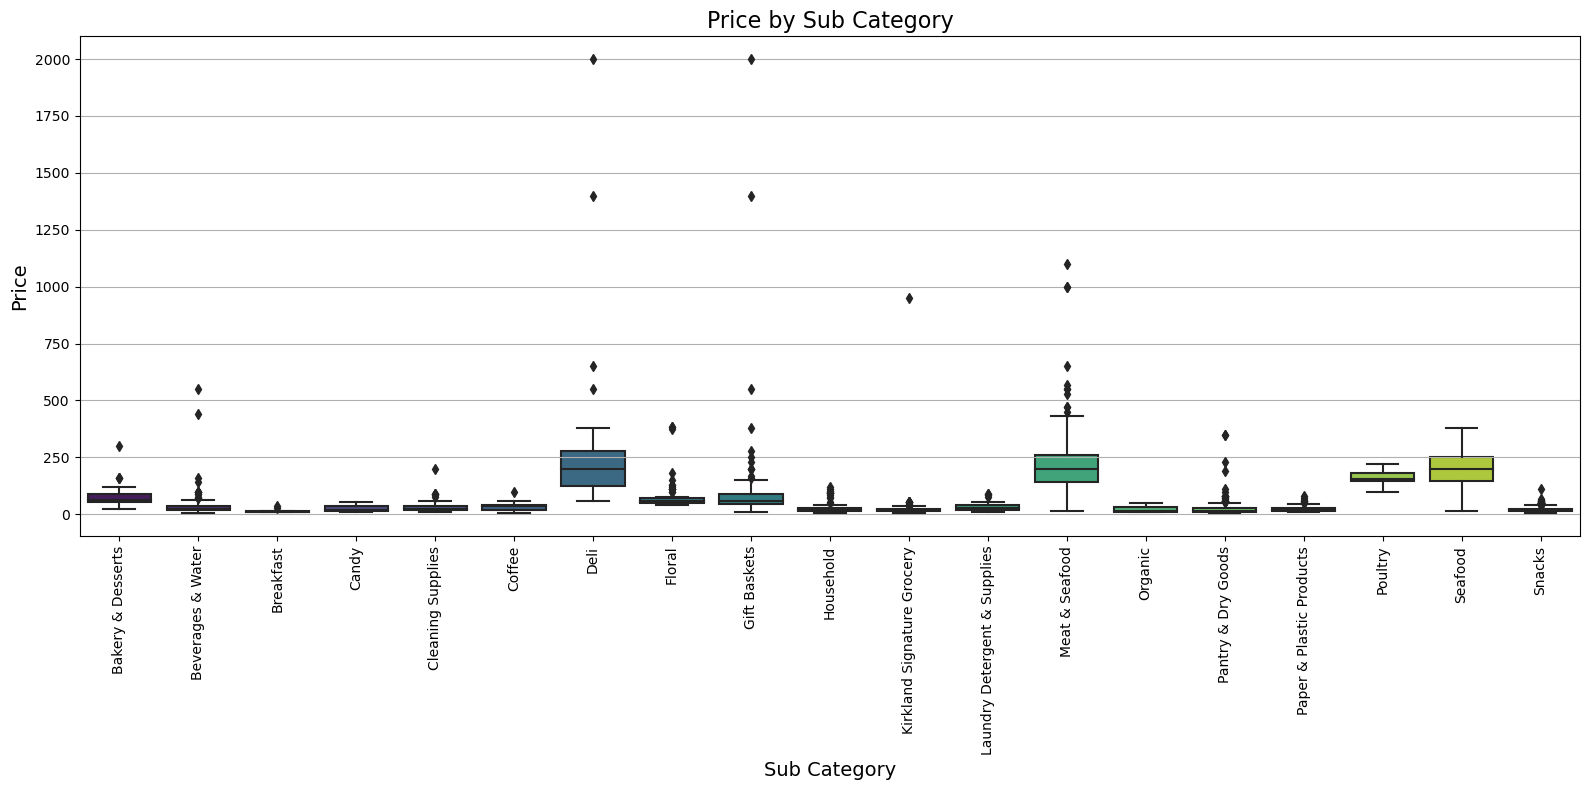

In [18]:
plt.figure(figsize=(16, 8))
sns.boxplot(x='Sub Category', y='Price', data=df, palette='viridis')

plt.xticks(rotation=90)
plt.xlabel('Sub Category', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.title('Price by Sub Category', fontsize=16)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

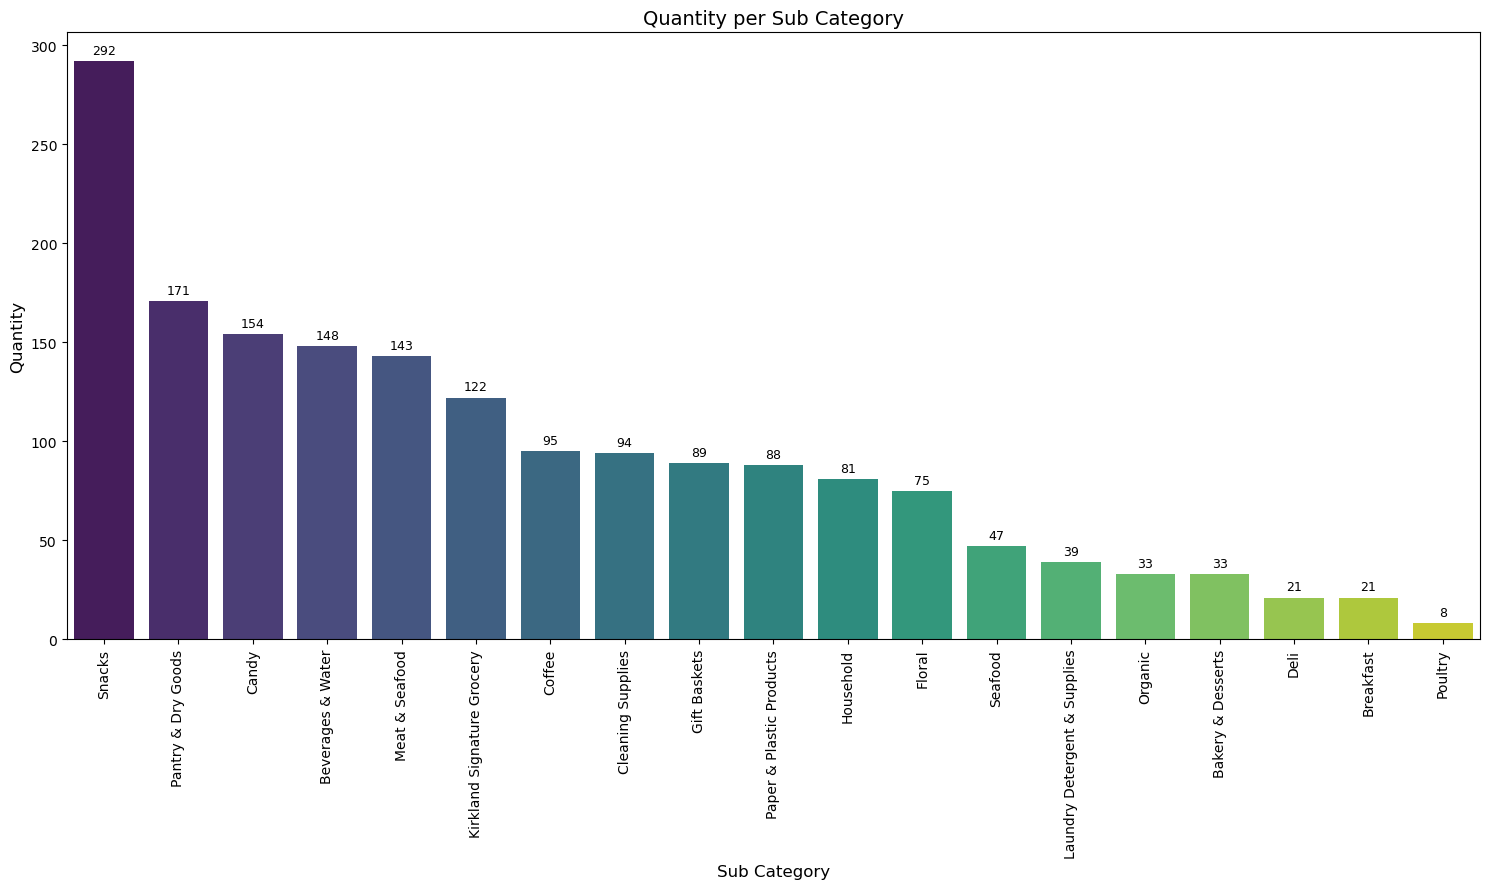

In [19]:
total_per_subcategory = df.groupby('Sub Category')['Price'].count().reset_index()

total_per_subcategory = total_per_subcategory.rename(columns={'Price': 'Quantity'})

sorted_subcategories_by_quantity = total_per_subcategory.sort_values('Quantity', ascending=False)

plt.figure(figsize=(15, 9))
ax = sns.barplot(data=sorted_subcategories_by_quantity, x='Sub Category', y='Quantity', palette='viridis')

plt.xticks(rotation=90)

for bar in ax.patches:
    ax.annotate(f'{bar.get_height():,.0f}',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom',
                fontsize=9, xytext=(0, 3),
                textcoords='offset points')

plt.xlabel('Sub Category', fontsize=12)
plt.ylabel('Quantity', fontsize=12)
plt.title('Quantity per Sub Category', fontsize=14)

plt.tight_layout()

plt.show()

In [11]:
df['Numeric Rating'] = df['Rating'].str.extract('(\d+\.\d+|\d+)')
df

,Sub Category,Price,Discount,Rating,Title,Currency,Feature,Product Description,Numeric Rating
0,Bakery & Desserts,56.99,No Discount,Rated 4.3 out of 5 stars based on 265 reviews.,"David’s Cookies Mile High Peanut Butter Cake, ...",$,"""10"""" Peanut Butter Cake\nCertified Kosher OU-...",A cake the dessert epicure will die for!Our To...,4.3
1,Bakery & Desserts,159.99,No Discount,Rated 5 out of 5 stars based on 1 reviews.,"The Cake Bake Shop 8"" Round Carrot Cake (16-22...",$,Spiced Carrot Cake with Cream Cheese Frosting ...,"Due to the perishable nature of this item, ord...",5
2,Bakery & Desserts,44.99,No Discount,Rated 4.1 out of 5 stars based on 441 reviews.,"St Michel Madeleine, Classic French Sponge Cak...",$,100 count\nIndividually wrapped\nMade in and I...,Moist and buttery sponge cakes with the tradit...,4.1
3,Bakery & Desserts,39.99,No Discount,Rated 4.7 out of 5 stars based on 9459 reviews.,"David's Cookies Butter Pecan Meltaways 32 oz, ...",$,Butter Pecan Meltaways\n32 oz 2-Pack\nNo Prese...,These delectable butter pecan meltaways are th...,4.7
4,Bakery & Desserts,59.99,No Discount,Rated 4.5 out of 5 stars based on 758 reviews.,"David’s Cookies Premier Chocolate Cake, 7.2 lb...",$,"""10"" Four Layer Chocolate Cake\nCertified Kosh...",A cake the dessert epicure will die for!To the...,4.5
...,...,...,...,...,...,...,...,...,...
1752,Snacks,23.99,No Discount,NaN,"Oberto Thin Style Smoked Sausage Stick, Cockta...",$,Cocktail Pepperoni Smoked Sausage Sticks 3...,Cocktail PepperoniSmoked Sausage Sticks3 oz ba...,NaN
1753,Snacks,49.99,No Discount,NaN,"Cheetos Crunchy, Original, 2.1 oz, 64-count",$,Made with Real Cheese,64-count2.1 oz Bags,NaN
1754,Snacks,22.99,No Discount,NaN,"Sabritas Chile & Limon Mix, Variety Pack, 30-c...",$,Chile & Limón Mix Variety Pack 30 ct Net...,8-Doritos Dinamita Chile Limón Flavored Rolled...,NaN
1755,Snacks,17.49,No Discount,NaN,"Fruit Roll-Ups, Variety Pack, 72-count",$,Variety Pack 1 Box with 72 Rolls Flavore...,Fruit Flavored Snacks\nVariety Includes: Straw...,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1757 entries, 0 to 1756
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sub Category         1757 non-null   object 
 1   Price                1754 non-null   float64
 2   Discount             1757 non-null   object 
 3   Rating               682 non-null    object 
 4   Title                1757 non-null   object 
 5   Currency             1752 non-null   object 
 6   Feature              1739 non-null   object 
 7   Product Description  1715 non-null   object 
 8   Numeric Rating       617 non-null    object 
dtypes: float64(1), object(8)
memory usage: 123.7+ KB


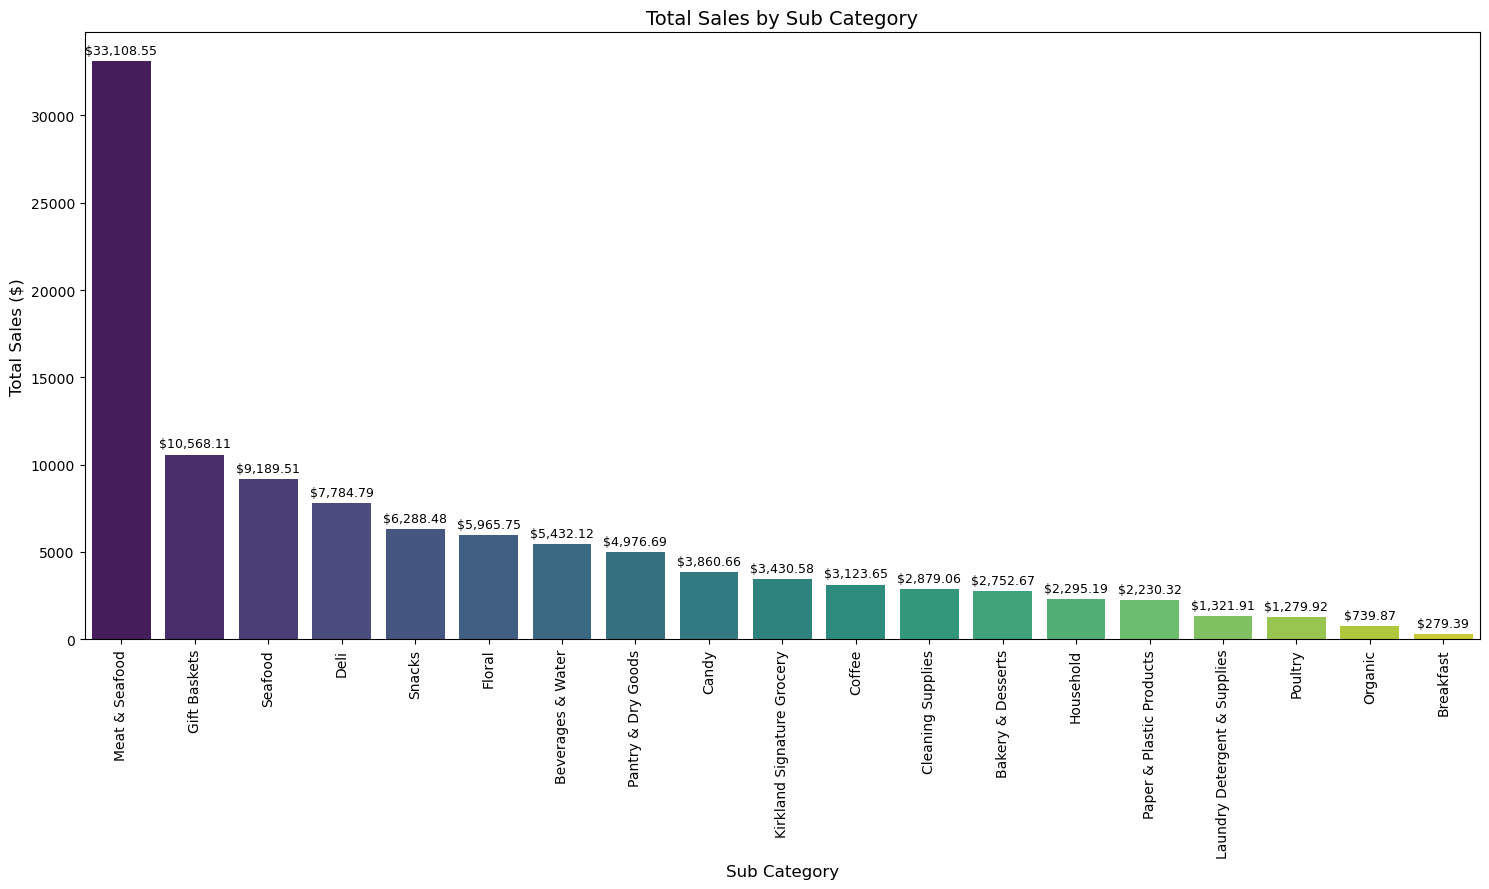

In [12]:
total_sales_per_subcategory = df.groupby('Sub Category')['Price'].sum().reset_index()

sorted_subcategories_by_sales = total_sales_per_subcategory.sort_values('Price', ascending=False)

plt.figure(figsize=(15, 9))
ax = sns.barplot(data=sorted_subcategories_by_sales, x='Sub Category', y='Price', palette='viridis')

plt.xticks(rotation=90)

for bar in ax.patches:
    ax.annotate(f'${bar.get_height():,.2f}',
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='bottom',
                fontsize=9, xytext=(0, 3),
                textcoords='offset points')

plt.xlabel('Sub Category', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.title('Total Sales by Sub Category', fontsize=14)

plt.tight_layout()

plt.show()

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Sélectionner les caractéristiques et la variable cible
X = df[['Price']]
y = df['Numeric Rating']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer et entraîner un modèle de régression polynomiale
degree = 2  # Degré du polynôme
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
predictions_poly = polyreg.predict(X_test)

# Évaluer la performance du modèle
mse_poly = mean_squared_error(y_test, predictions_poly)
rmse_poly = np.sqrt(mse_poly)
r2_poly = r2_score(y_test, predictions_poly)

print(f'RMSE (Polynomial Regression): {rmse_poly}')
print(f'R² (Polynomial Regression): {r2_poly}')


ValueError: Input X contains NaN.
PolynomialFeatures does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values